In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader as pdr
from datetime import datetime

In [3]:
df = pd.read_csv("E:/Userfiles/Download/archive (2)/NIFTY50_all.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [4]:
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

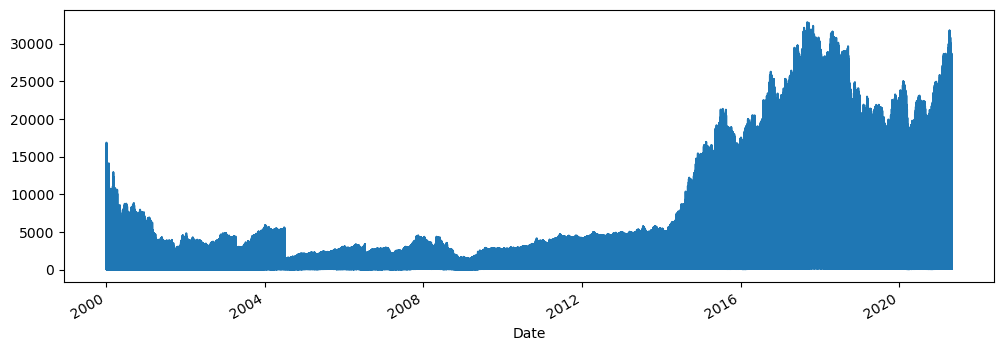

In [7]:
df1['Close'].plot(figsize=(12,4))

In [8]:
df1.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [9]:
df2 = df1.resample(rule='M').mean()
df2

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-31,990.750445,991.073220,1018.145401,956.927967,985.608754,985.506899,988.442849,8.483939e+05,4.265174e+13,NaN,NaN,NaN
2000-02-29,1009.437675,1027.197969,1053.553011,986.670658,1016.038866,1016.286625,1021.410952,6.002124e+05,4.069786e+13,NaN,NaN,NaN
2000-03-31,1009.531204,1015.878194,1049.629075,969.072761,1003.526285,1003.735536,1008.308003,6.247734e+05,3.572006e+13,NaN,NaN,NaN
2000-04-30,921.418241,919.170741,948.411481,881.949630,912.364352,912.327407,910.361278,9.699313e+05,4.260544e+13,NaN,NaN,NaN
2000-05-31,732.925379,731.916212,758.160379,700.234924,729.725530,728.820833,729.534818,6.969134e+05,3.985220e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,2403.160622,2409.947495,2436.912848,2378.259879,2407.066466,2408.197635,2407.561911,1.233988e+07,6.305715e+14,115861.473098,3.490097e+06,0.313972
2021-01-31,2475.701480,2481.782908,2511.538367,2442.836122,2470.326837,2471.411939,2476.754153,1.385968e+07,7.704854e+14,138824.626531,3.620827e+06,0.313678
2021-02-28,2566.874439,2571.901837,2612.556276,2531.970204,2572.978010,2572.369235,2573.184112,1.529610e+07,8.471368e+14,154885.755102,4.193736e+06,0.320195


<AxesSubplot:xlabel='Date'>

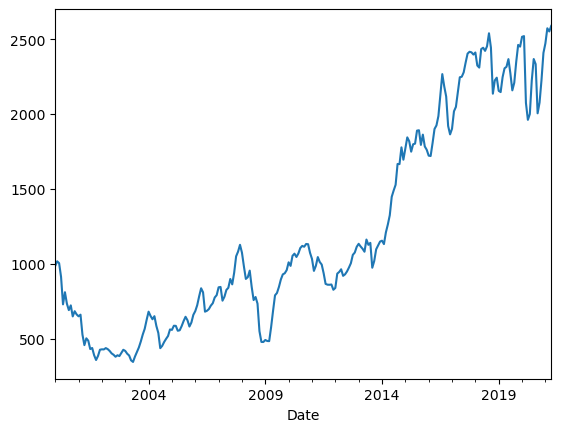

In [10]:
df2.resample(rule='M').max()['Close'].plot()

In [11]:
df3 = df2.drop(df2.columns[[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11]], axis=1)

In [12]:
df3

,Close
Date,
2000-01-31,985.506899
2000-02-29,1016.286625
2000-03-31,1003.735536
2000-04-30,912.327407
2000-05-31,728.820833
...,...
2020-12-31,2408.197635
2021-01-31,2471.411939
2021-02-28,2572.369235


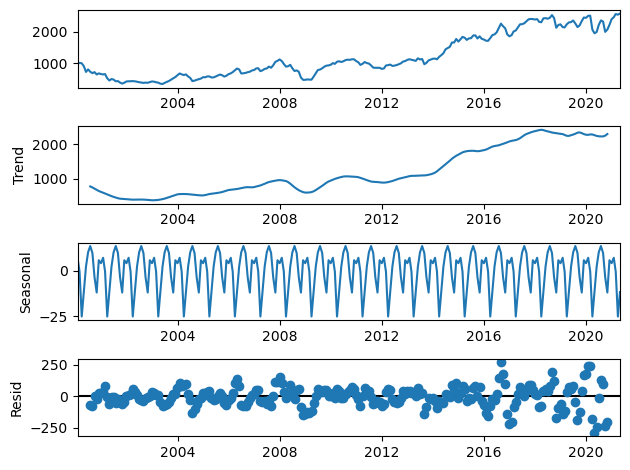

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3, period=12)
result.plot();

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df3['Close'])

ADF Statistics: 0.1726717493158941
p- value: 0.970686503413163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
df3['Close 1st difference']=df3['Close']-df3['Close'].shift(1)

In [18]:
df3.head()

,Close,Close 1st difference
Date,,
2000-01-31,985.506899,NaN
2000-02-29,1016.286625,30.779726
2000-03-31,1003.735536,-12.551089
2000-04-30,912.327407,-91.408129
2000-05-31,728.820833,-183.506574


In [19]:
adf_test(df3['Close 1st difference'].dropna())

ADF Statistics: -11.656888674107465
p- value: 1.9756024687624776e-21
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

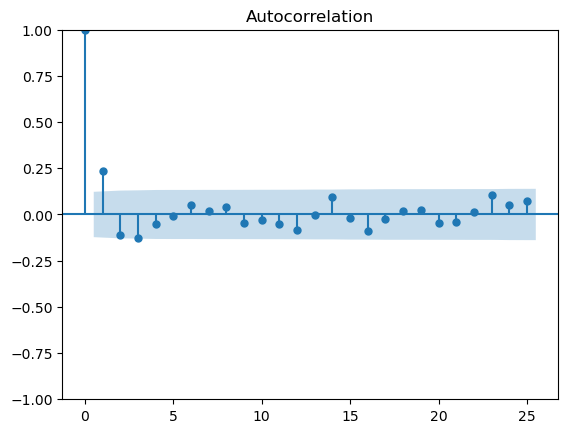

In [21]:
acf = plot_acf(df3["Close 1st difference"].dropna())

C:\Users\Priya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


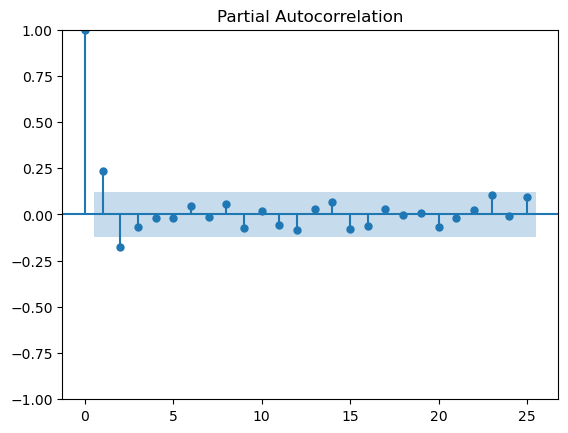

In [22]:
Pacf = plot_pacf(df3["Close 1st difference"].dropna())

In [23]:
df3

,Close,Close 1st difference
Date,,
2000-01-31,985.506899,NaN
2000-02-29,1016.286625,30.779726
2000-03-31,1003.735536,-12.551089
2000-04-30,912.327407,-91.408129
2000-05-31,728.820833,-183.506574
...,...,...
2020-12-31,2408.197635,181.838145
2021-01-31,2471.411939,63.214304
2021-02-28,2572.369235,100.957296


In [24]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2014,4,30)
test_dataset_end=datetime(2021,4,30)

In [25]:
train_data=df3[:train_dataset_end]
test_data=df3[train_dataset_end+timedelta(days=1):test_dataset_end]

In [26]:
train_data

,Close,Close 1st difference
Date,,
2000-01-31,985.506899,NaN
2000-02-29,1016.286625,30.779726
2000-03-31,1003.735536,-12.551089
2000-04-30,912.327407,-91.408129
2000-05-31,728.820833,-183.506574
...,...,...
2013-12-31,1148.092614,25.411951
2014-01-31,1153.993700,5.901086
2014-02-28,1131.257358,-22.736342


In [27]:
test_data

,Close,Close 1st difference
Date,,
2014-05-31,1324.044023,61.996007
2014-06-30,1447.029981,122.985957
2014-07-31,1489.291976,42.261995
2014-08-31,1527.356230,38.064254
2014-09-30,1666.316048,138.959818
...,...,...
2020-12-31,2408.197635,181.838145
2021-01-31,2471.411939,63.214304
2021-02-28,2572.369235,100.957296


In [28]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
print(pred_start_date)
print(pred_end_date)

2014-05-31 00:00:00
2021-04-30 00:00:00


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model_SARIMA=SARIMAX(train_data['Close'],order=(1,1,1),seasonal_order=(0,1,0,12))

In [32]:
model_SARIMA_fit=model_SARIMA.fit()

In [33]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                  172
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -901.009
Date:                             Mon, 06 Mar 2023   AIC                           1808.019
Time:                                     15:23:41   BIC                           1817.225
Sample:                                 01-31-2000   HQIC                          1811.757
                                      - 04-30-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0368      0.223      0.165      0.869      -0.401       0.474
ma.L1          0.3349      0.201      1.665      0.096      -0.059       0.729
sigma2      4888.3080    449.015     10.887      0.000    4008.254    5768.362
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.36
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                            -0.19
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Close']-pred_Sarima

<AxesSubplot:xlabel='Date'>

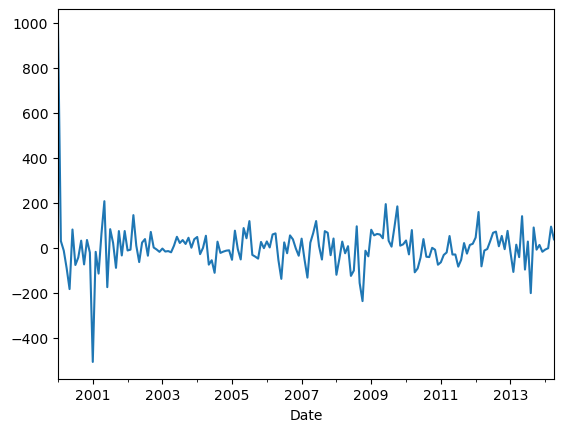

In [35]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

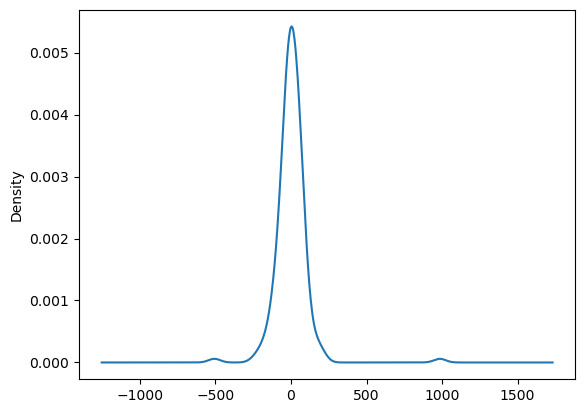

In [36]:
model_SARIMA_fit.resid.plot(kind='kde')

In [37]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Priya\AppData\Local\Temp\ipykernel_3008\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Date'>

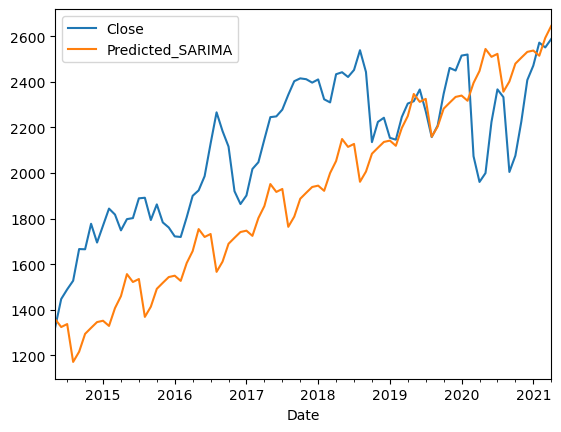

In [39]:
test_data[['Close','Predicted_SARIMA']].plot()

In [40]:
import pickle
pickle_out = open("Forecasting.pkl","wb")
loaded_model = pickle.dump(model_SARIMA, pickle_out)
pickle_out.close()